# logistic regression

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Charger les données
data = pd.read_csv('dataset_Valide_Final.csv', sep=';', encoding='utf-8')

# Supprimer les colonnes non pertinentes
data = data[['Product', 'Issue', 'Company', 'Submitted Via', 'Consumer Consent']]

In [3]:
# Convertir les variables catégoriques en variables indicatrices
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(data[['Product', 'Issue', 'Company', 'Submitted Via']])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data['Consumer Consent'], test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [4]:
# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Exemple d'interprétation des coefficients a f liniare 
coefficients = pd.DataFrame(model.coef_, columns=encoder.get_feature_names_out())
print(coefficients)


Accuracy: 0.706613480465255
   Product_Bank account or service  Product_Consumer Loan  \
0                        -0.028881              -0.011495   
1                         0.111095              -0.049408   
2                        -0.971918              -0.508275   
3                         0.889703               0.569177   

   Product_Credit card  Product_Credit reporting  Product_Debt collection  \
0            -0.118142                  0.038894                 0.313116   
1            -0.144765                  0.028416                 0.177036   
2            -1.191780                 -1.542078                -1.756757   
3             1.454687                  1.474769                 1.266605   

   Product_Money transfers  Product_Mortgage  Product_Other financial service  \
0                -0.315724          0.016214                        -0.166222   
1                -0.362690         -0.002959                        -0.174262   
2                -0.105837         -1

In [5]:
predictions = model.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.706613480465255


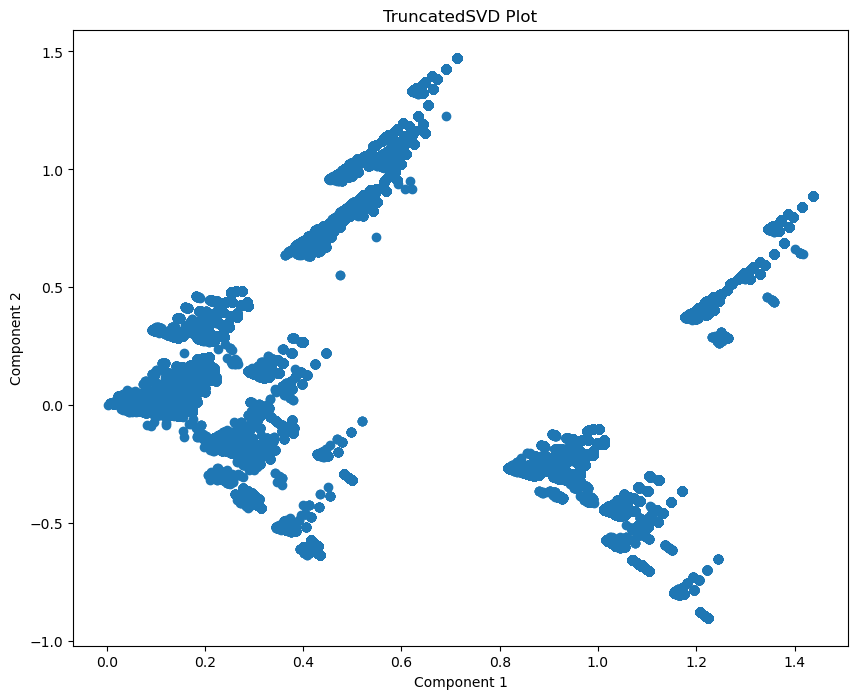

In [28]:
from sklearn.decomposition import TruncatedSVD

# Convertir les variables catégoriques en variables indicatrices
encoder = OneHotEncoder()
data_encoded_sparse = encoder.fit_transform(data[['Product', 'Issue', 'Company', 'Submitted Via']])

# Réduire la dimensionnalité avec TruncatedSVD objective de minimiser 
svd = TruncatedSVD(n_components=2)
data_encoded_svd = svd.fit_transform(data_encoded_sparse)

# Créer un DataFrame avec les nouvelles dimensions
data_svd_df = pd.DataFrame(data_encoded_svd, columns=['Component 1', 'Component 2'])

# Tracer le résultat de TruncatedSVD
plt.figure(figsize=(10, 8))
plt.scatter(data_svd_df['Component 1'], data_svd_df['Component 2'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('TruncatedSVD Plot')
plt.show()
#la composante 1 représente la direction dans laquelle les données varient le plus
#la composante 2 représente la direction suivante la plus importante en termes de variance. 
#Ces deux composantes permettent de visualiser les données dans un espace de dimension inférieure (2D dans ce cas)
#tout en conservant autant d'informations que possible. Cela peut aider à visualiser les relations générales entre les données encodées.

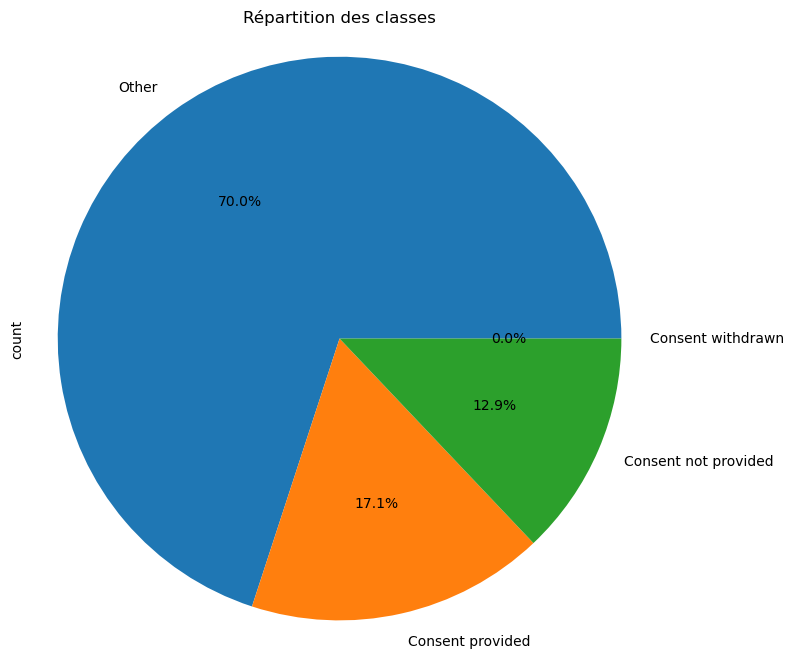

In [19]:
data['Consumer Consent'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.axis('equal')
plt.title('Répartition des classes')
plt.show()

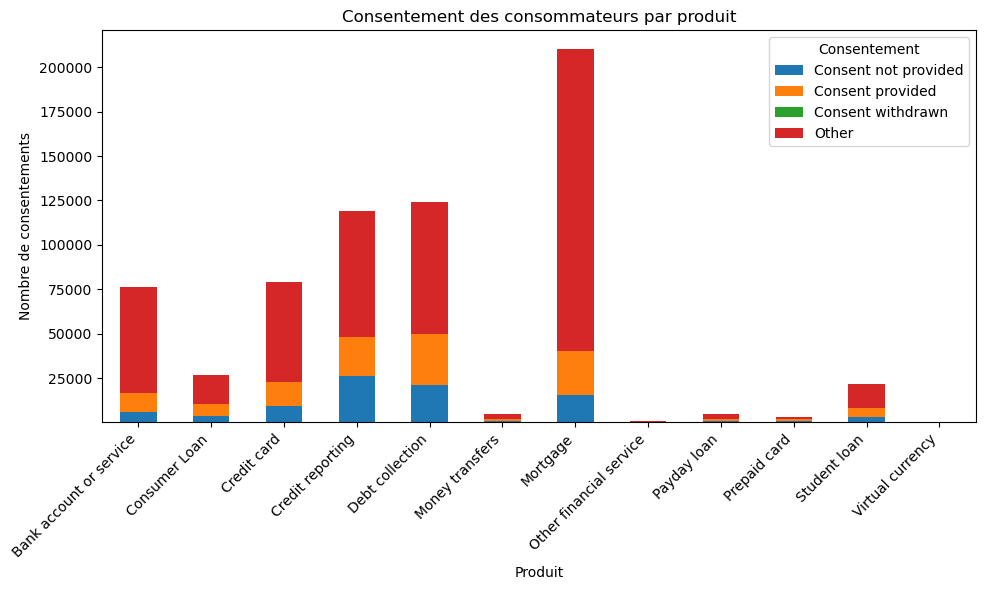

In [29]:
import matplotlib.pyplot as plt

# Calculer le nombre de consentements par produit
consent_by_product = data.groupby('Product')['Consumer Consent'].value_counts().unstack()

# Tracer le diagramme à barres
consent_by_product.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Produit')
plt.ylabel('Nombre de consentements')
plt.title('Consentement des consommateurs par produit')
plt.legend(title='Consentement')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


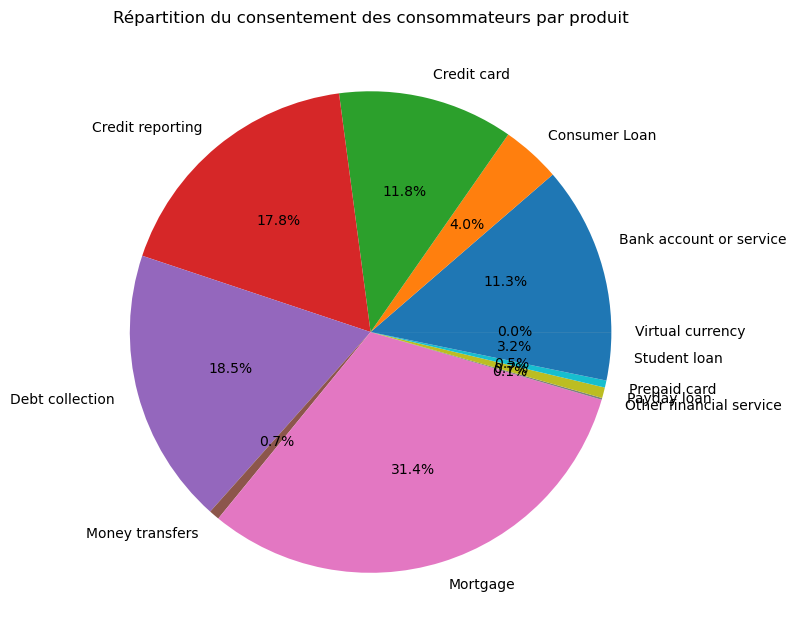

In [30]:
# Tracer le diagramme en camembert (consumer consent by product)
consent_by_product.sum(axis=1).plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.ylabel('')
plt.title('Répartition du consentement des consommateurs par produit')
plt.tight_layout()
plt.show()


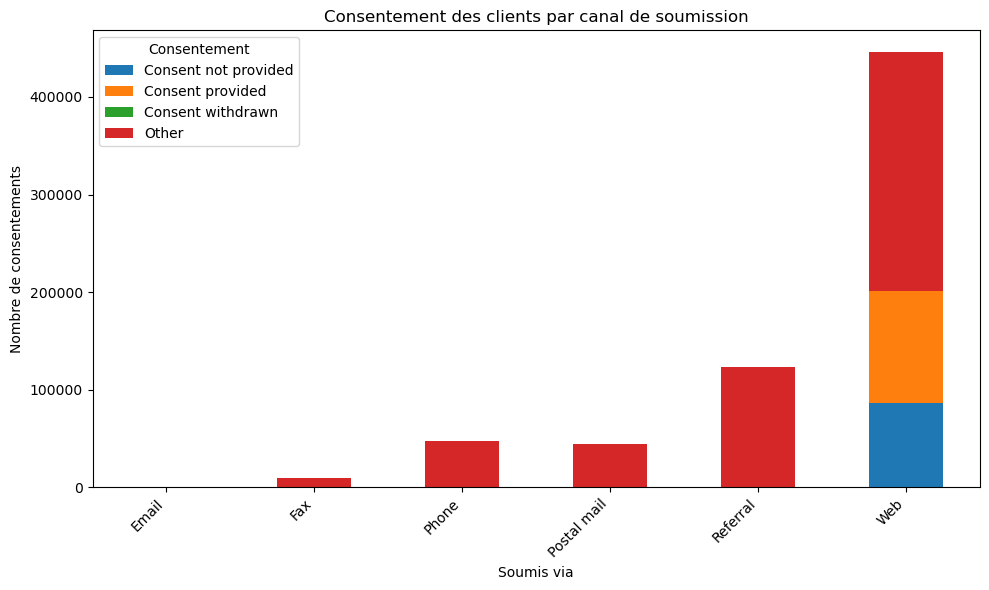

In [31]:
import matplotlib.pyplot as plt

# Calculer le nombre de consentements par canal de soumission
consent_by_submitted_via = data.groupby('Submitted Via')['Consumer Consent'].value_counts().unstack()

# Tracer le diagramme à barres
consent_by_submitted_via.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Soumis via')
plt.ylabel('Nombre de consentements')
plt.title('Consentement des clients par canal de soumission')
plt.legend(title='Consentement')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


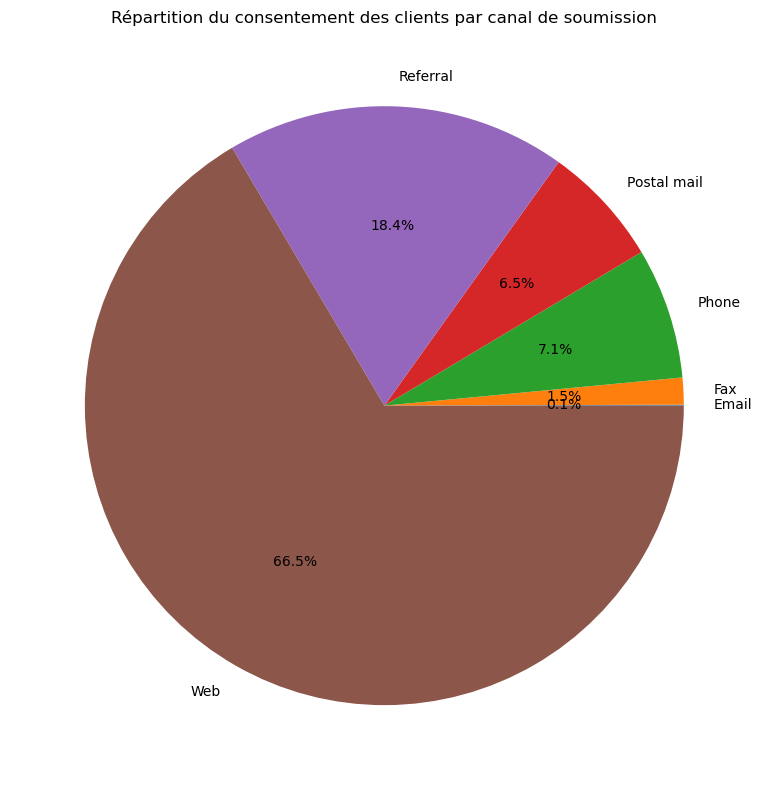

In [32]:
# Tracer le diagramme en camembert
consent_by_submitted_via.sum(axis=1).plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.ylabel('')
plt.title('Répartition du consentement des clients par canal de soumission')
plt.tight_layout()
plt.show()
